#1. Normal graph prediction:
##1.1. Load friend network from edge-list file data/friend_network.txt


In [37]:
import networkx as nx

G=nx.read_edgelist("friend_network.txt")

##1.2. Complete the following requirements:

Compute the following coefficient score:

-Jaccard’s coefficient

-Adamic-Adar

-Preferential attachment (PA)

-Salton index

-Sorensen index

-Hub Promoted index

-Hub Depressed Index

-SimRank similarity

Print the results out of List of friends: [("Ana", "Tino"), ("Mark", "Tim")]

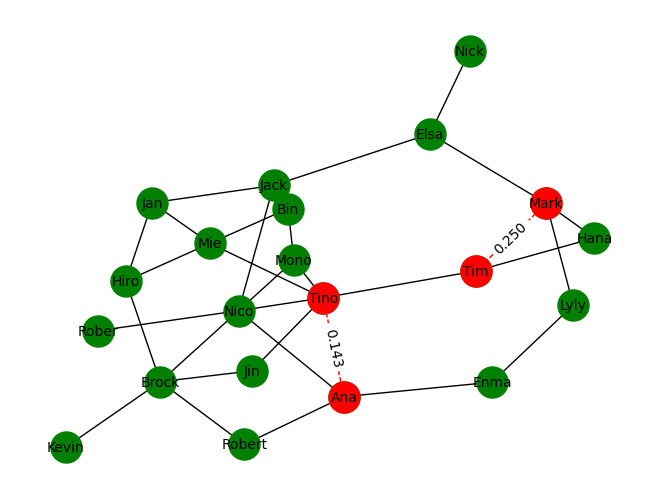

In [38]:
#Jaccard's coefficient of node pairs

def draw_coefficient_edges(G,preds):
  edge_labels={}
  target_list=[]

  for u, v, p in preds:
    edge_labels[(u, v)] = f"{p:.3f}"
    target_list.append(u)
    target_list.append(v)

  pos=nx.spring_layout(G)

  nx.draw(G,pos,
          node_size=500,
          node_color='green',
          with_labels=True,
          font_size=10)
  nx.draw_networkx_nodes(G,pos,
                         nodelist=target_list,
                         node_size=500,
                         node_color='red')
  nx.draw_networkx_edges(G,pos,edgelist=node_list,style='dashed',edge_color='red')

  nx.draw_networkx_edge_labels(
      G,pos,
      edge_labels=edge_labels,
      font_color='black'
  )

node_list=[("Ana","Tino"),("Mark","Tim")]
preds=nx.jaccard_coefficient(G,node_list)
draw_coefficient_edges(G,preds)

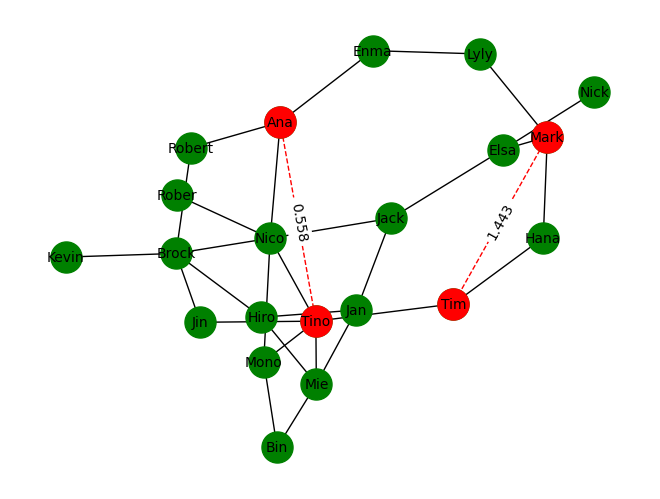

In [39]:
#Adamic-Adar of node pairs

node_list = [("Ana","Tino"),("Mark","Tim")]
preds = nx.adamic_adar_index(G, node_list)

draw_coefficient_edges(G, preds)

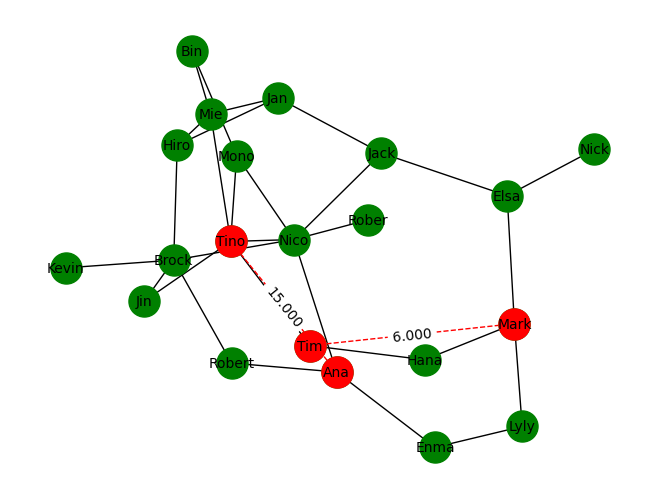

In [40]:
# Preferential attachment (PA) of node pairs


node_list=[("Ana","Tino"),("Mark","Tim")]
preds = nx.preferential_attachment(G, node_list)

draw_coefficient_edges(G, preds)

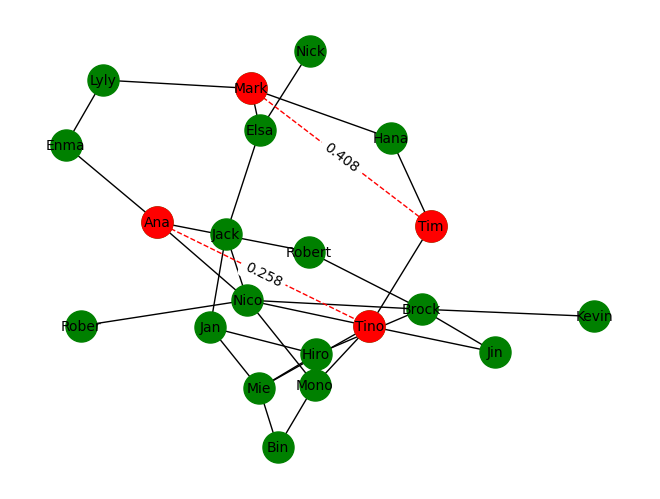

In [41]:
# Salton index

import math

def salton_index(G, u, v):
    return len(sorted(nx.common_neighbors(G, u, v))) / math.sqrt(G.degree(u) * G.degree(v))

def calculate_salton_index(G, node_list):
    return ((source, target, salton_index(G, source, target)) for source, target in node_list)


node_list=[("Ana","Tino"),("Mark","Tim")]
preds = calculate_salton_index(G, node_list)

draw_coefficient_edges(G, preds)

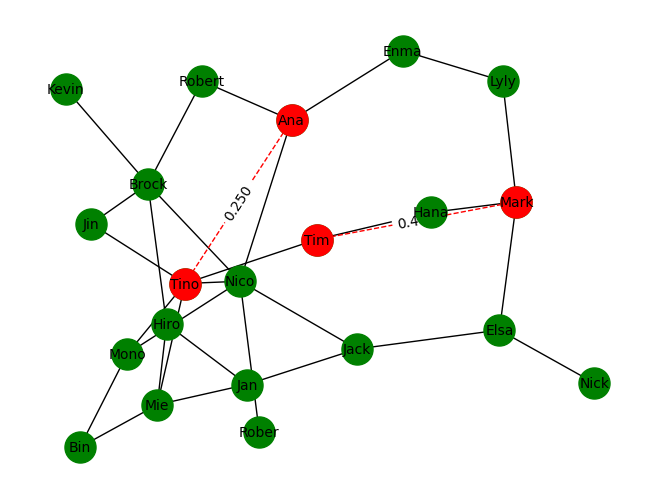

In [42]:
# Sorensen index

def sorensen_index(G, u, v):
    return 2 * len(sorted(nx.common_neighbors(G, u, v))) / (G.degree(u) + G.degree(v))

# Function to calculate Sorensen index of a list of node pairs
def calculate_sorensen_index(G, node_list):
    return ((source, target, sorensen_index(G, source, target)) for source, target in node_list)


node_list=[("Ana","Tino"),("Mark","Tim")]
preds = calculate_sorensen_index(G, node_list)

draw_coefficient_edges(G, preds)

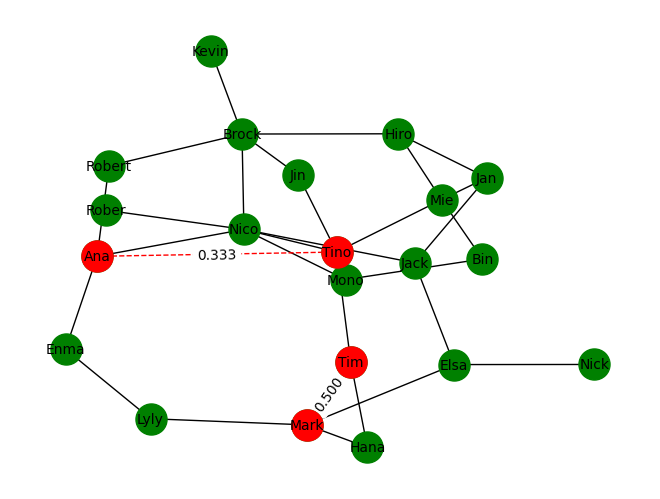

In [43]:
# Hub Promoted index

def hub_promoted_index(G, u, v):
    return len(sorted(nx.common_neighbors(G, u, v))) / min(G.degree(u), G.degree(v))

def calculate_hub_promoted_index(G, node_list):
    return ((source, target, hub_promoted_index(G, source, target)) for source, target in node_list)

node_list=[("Ana","Tino"),("Mark","Tim")]
preds = calculate_hub_promoted_index(G, node_list)

draw_coefficient_edges(G, preds)

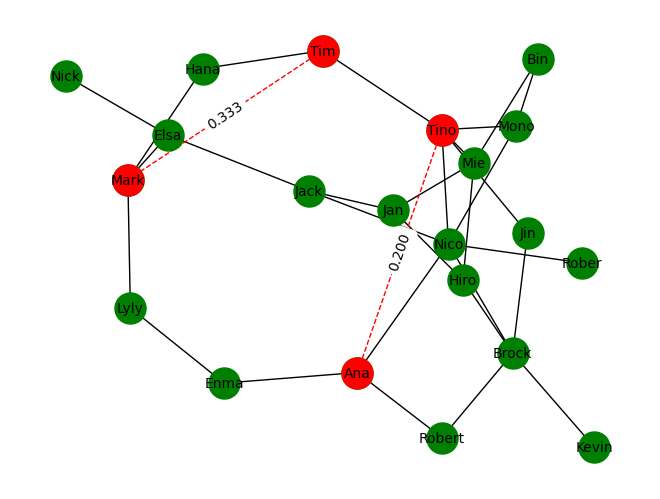

In [44]:
# Hub Depressed Index

def hub_depressed_index(G, u, v):
    return len(sorted(nx.common_neighbors(G, u, v))) / max(G.degree(u), G.degree(v))

def calculate_hub_depressed_index(G, node_list):
    return ((source, target, hub_depressed_index(G, source, target)) for source, target in node_list)


node_list=[("Ana","Tino"),("Mark","Tim")]
preds = calculate_hub_depressed_index(G, node_list)

draw_coefficient_edges(G, preds)

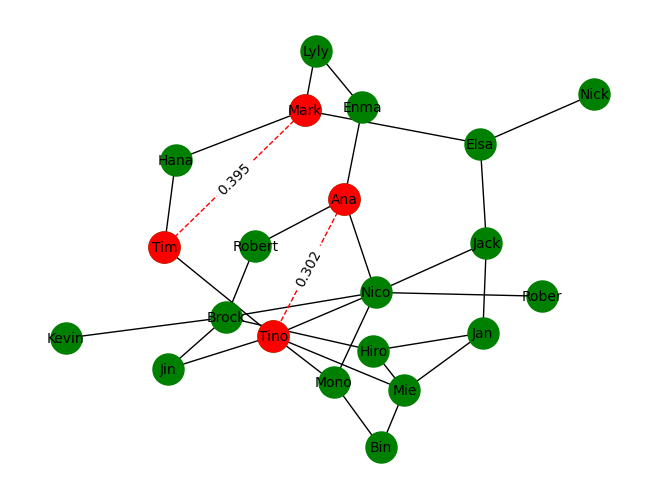

In [45]:
# SimRank similarity

def calculate_simrank_similarity(G, node_list):
    return ((source, target, nx.simrank_similarity(G, source, target)) for source, target in node_list)

node_list=[("Ana","Tino"),("Mark","Tim")]
preds = calculate_simrank_similarity(G, node_list)

draw_coefficient_edges(G, preds)

#2. Assignment on large-scale network:
##2.1 Load and Draw
-Load SC-TS graph from the file: data/SC-TS.txt in the class github.

-Read pair of nodes in the file: data/node_pairs.txt


-Calculate common neighbors (CN), Jaccard (JC), Adamic-Adar (AA), Preferential attachment (PA) and SimRank similarity of these above pair of nodes.


-Draw graph and the link among above node pairs.


Notes: in the node pairs file, 2 columns correspond to 2 nodes in a pair, and the number of rows is the number of pairs.


SimRank similarity: 
(F17E9.12, F45E1.6) -> 0.11804462
(C50F4.5, T23D8.5) -> 0.11804340
(B0035.8, B0035.10) -> 0.11805700


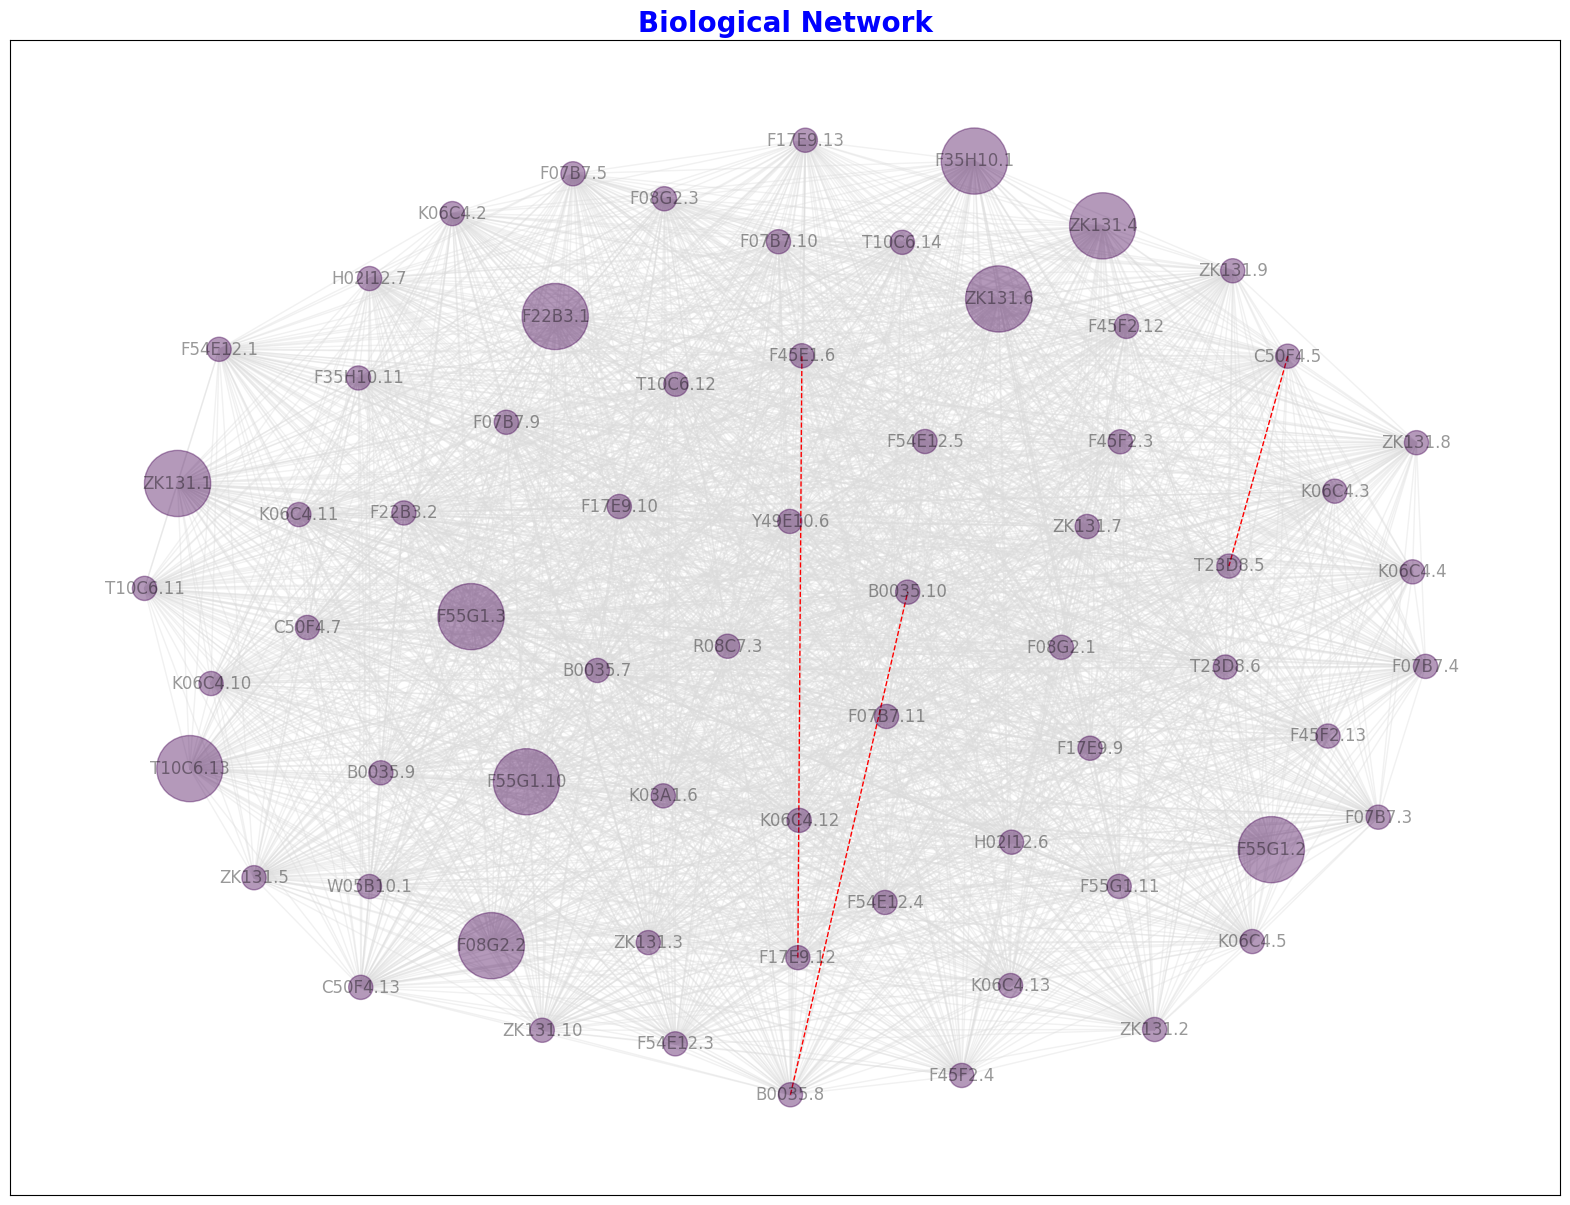

In [58]:
import matplotlib.pyplot as plt

# Function to calculate SimRank similarity of a list of node pairs
def calculate_simrank_similarity(G, node_list):
    return ((source, target, nx.simrank_similarity(G, source, target)) for source, target in node_list)

# largest connected component
def get_largest_component(G):
    components = nx.connected_components(G)
    largest_component = max(components, key=len)
    largest_subgraph = G.subgraph(largest_component)

    return largest_subgraph

def draw_graph_betweenness_centrality(G, largest_component, pos):
    # Calculate betweenness centrality
    centrality = nx.betweenness_centrality(largest_component, k=10, endpoints=True)

    # Compute community structure
    lpc = nx.community.label_propagation_communities(largest_component)
    community_index = {n: i for i, com in enumerate(lpc) for n in com}

    # Draw graph using matplotlib
    fig, ax = plt.subplots(figsize=(20, 15))
    node_color = [community_index[n] for n in largest_component]
    node_size = [v * 20000 for v in centrality.values()]
    nx.draw_networkx(
        largest_component,
        pos=pos,
        with_labels=True,
        node_color=node_color,
        node_size=node_size,
        edge_color="gainsboro",
        alpha=0.4,

    )

    # Title/legend
    font = {"color": "blue", "fontweight": "bold", "fontsize": 20}
    ax.set_title("Biological Network", font)

# Read graph data from edgelist
G = nx.read_weighted_edgelist("SC-TS.txt")

# Spring layout
largest_component = get_largest_component(G)
pos = nx.spring_layout(largest_component, k=0.15)
draw_graph_betweenness_centrality(G, largest_component, pos)

node_list =  [('F17E9.12', 'F45E1.6'), ('C50F4.5', 'T23D8.5'), ('B0035.8', 'B0035.10')]

preds = calculate_simrank_similarity(G, node_list)

print("SimRank similarity: ")
for u, v, p in preds:
    print(f"({u}, {v}) -> {p:.8f}")

target_list = []

for u, v, p in preds:
    target_list.append(u)
    target_list.append(v)

# Mark edges
nx.draw_networkx_edges(G, pos, edgelist=node_list, style='dashed', edge_color='r')

In [59]:
# Common neighbors
for node_pair in node_list:
    cn = sorted(nx.common_neighbors(G, node_pair[0], node_pair[1]))
    print(f"Common neighbors of {node_pair}: {cn}")

Common neighbors of ('F17E9.12', 'F45E1.6'): ['B0035.10', 'B0035.7', 'B0035.8', 'B0035.9', 'C50F4.13', 'C50F4.5', 'C50F4.7', 'F07B7.10', 'F07B7.11', 'F07B7.3', 'F07B7.4', 'F07B7.5', 'F07B7.9', 'F08G2.1', 'F08G2.2', 'F08G2.3', 'F17E9.10', 'F17E9.13', 'F17E9.9', 'F22B3.1', 'F22B3.2', 'F35H10.1', 'F35H10.11', 'F45F2.12', 'F45F2.13', 'F45F2.3', 'F45F2.4', 'F54E12.1', 'F54E12.3', 'F54E12.4', 'F54E12.5', 'F55G1.10', 'F55G1.11', 'F55G1.2', 'F55G1.3', 'H02I12.6', 'H02I12.7', 'K03A1.6', 'K06C4.10', 'K06C4.11', 'K06C4.12', 'K06C4.13', 'K06C4.2', 'K06C4.3', 'K06C4.4', 'K06C4.5', 'R08C7.3', 'T10C6.11', 'T10C6.12', 'T10C6.13', 'T10C6.14', 'T23D8.5', 'T23D8.6', 'W05B10.1', 'Y49E10.6', 'ZK131.1', 'ZK131.10', 'ZK131.2', 'ZK131.3', 'ZK131.4', 'ZK131.5', 'ZK131.6', 'ZK131.7', 'ZK131.8', 'ZK131.9']
Common neighbors of ('C50F4.5', 'T23D8.5'): ['B0035.10', 'B0035.7', 'B0035.8', 'B0035.9', 'C50F4.13', 'C50F4.7', 'F07B7.10', 'F07B7.11', 'F07B7.3', 'F07B7.4', 'F07B7.5', 'F07B7.9', 'F08G2.1', 'F08G2.2', 'F08G2

In [48]:
# Jaccard Coefficient
def calculate_jaccard_coefficient(G, node_list):
    return list(nx.jaccard_coefficient(G, node_list))

for u, v in node_list:
    jaccard_coefficient = calculate_jaccard_coefficient(largest_component, [(u, v)])
    print(f"Jaccard Coefficient between {u} and {v}: {jaccard_coefficient}")

Jaccard Coefficient between F17E9.12 and F45E1.6: [('F17E9.12', 'F45E1.6', 0.9701492537313433)]
Jaccard Coefficient between C50F4.5 and T23D8.5: [('C50F4.5', 'T23D8.5', 0.9701492537313433)]
Jaccard Coefficient between B0035.8 and B0035.10: [('B0035.8', 'B0035.10', 0.9701492537313433)]


In [49]:
# Adamic-Adar
def calculate_adamic_adar_index(G, node_list):
    # Check if nodes exist in the graph
    for node_pair in node_list:
        if not all(node in G for node in node_pair):
            print(f"Node pair {node_pair} does not exist in the graph.")
            return
    return list(nx.adamic_adar_index(G, node_list))

for u, v in node_list:
    adamic_adar = calculate_adamic_adar_index(largest_component, [(u, v)])
    print(f"Adamic-Adar Index between {u} and {v}: {adamic_adar}")

Adamic-Adar Index between F17E9.12 and F45E1.6: [('F17E9.12', 'F45E1.6', 15.514404885917003)]
Adamic-Adar Index between C50F4.5 and T23D8.5: [('C50F4.5', 'T23D8.5', 15.514404885917003)]
Adamic-Adar Index between B0035.8 and B0035.10: [('B0035.8', 'B0035.10', 15.514404885917003)]


In [50]:
# Preferential Attachment
def calculate_preferential_attachment(G, node_list):
    # Check if nodes exist in the graph
    for node_pair in node_list:
        if not all(node in G for node in node_pair):
            print(f"Node pair {node_pair} does not exist in the graph.")
            return
    return list(nx.preferential_attachment(G, node_list))

for u, v in node_list:
    preferential_attachment = calculate_preferential_attachment(largest_component, [(u, v)])
    print(f"Preferential Attachment between {u} and {v}: {preferential_attachment}")

Preferential Attachment between F17E9.12 and F45E1.6: [('F17E9.12', 'F45E1.6', 4356)]
Preferential Attachment between C50F4.5 and T23D8.5: [('C50F4.5', 'T23D8.5', 4356)]
Preferential Attachment between B0035.8 and B0035.10: [('B0035.8', 'B0035.10', 4356)]


##2.2 Additional questions
-What are the top 5 pairs of nodes with the highest Jaccard (JC) similarity?

-What are the top 5 pairs of nodes with the highest Adamic-Adar (AA) index?

-What are the top 5 pairs of nodes with the highest Preferential Attachment (PA) score?

-What is the distribution of Common Neighbors (CN) scores?

-What is the distribution of Preferential Attachment (PA) scores?

-What is the distribution of SimRank scores?

In [61]:
# top 5 pairs of nodes with the highest Jaccard (JC) similarity
preds = nx.jaccard_coefficient(G)

jaccard_list = [(u, v, p) for u, v, p in preds]
jaccard_list_sorted = sorted(jaccard_list, key=lambda x: x[2], reverse=True)

top_5_jaccard = jaccard_list_sorted[:5]
for u, v, p in top_5_jaccard:
    print(f"Jaccard Coefficient between {u} and {v}: {p:.3f}")

Jaccard Coefficient between F25D1.5 and R05D8.9: 1.000
Jaccard Coefficient between F25D1.5 and T01G6.1: 1.000
Jaccard Coefficient between F25D1.5 and R05D8.7: 1.000
Jaccard Coefficient between F25D1.5 and F26D2.15: 1.000
Jaccard Coefficient between F25D1.5 and F28H7.2: 1.000


In [63]:
#top 5 pairs of nodes with the highest Adamic-Adar (AA) index
preds = nx.adamic_adar_index(G)

adamic_adar_list = [(u, v, p) for u, v, p in preds]
adamic_ada_sorted = sorted(adamic_adar_list, key=lambda x: x[2], reverse=True)

top_5_adamic_adar = adamic_ada_sorted[:5]
for u, v, p in top_5_adamic_adar:
    print(f"Adamic-Adar Index between {u} and {v}: {p:.3f}")

Adamic-Adar Index between T05F1.10 and T02E1.5: 18.818
Adamic-Adar Index between T05F1.10 and T11F9.11: 18.818
Adamic-Adar Index between F11A5.12 and C06B3.4: 15.881
Adamic-Adar Index between F11A5.12 and C56G2.6: 15.881
Adamic-Adar Index between F11A5.12 and C06B3.5: 15.881


In [64]:
#top 5 pairs of nodes with the highest Preferential Attachment (PA) score
preds = nx.preferential_attachment(G)

pa_list = [(u, v, p) for u, v, p in preds]
pa_list_sorted = sorted(pa_list, key=lambda x: x[2], reverse=True)

top_5_pa = pa_list_sorted[:5]
for u, v, p in top_5_pa:
    print(f"Preferential Attachment score between {u} and {v}: {p}")

Preferential Attachment score between K06C4.4 and T02E1.5: 3102
Preferential Attachment score between K06C4.4 and T11F9.11: 3102
Preferential Attachment score between ZK131.3 and T02E1.5: 3102
Preferential Attachment score between ZK131.3 and T11F9.11: 3102
Preferential Attachment score between ZK131.1 and T02E1.5: 3102


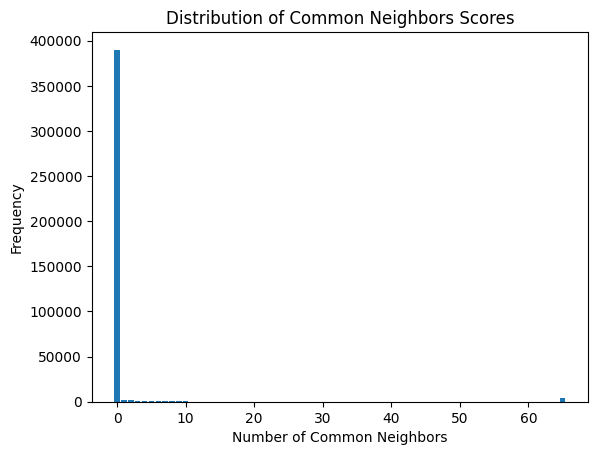

In [65]:
# distribution of Common Neighbors (CN) scores

from collections import defaultdict

cn_dict = defaultdict(int)
for u in G.nodes():
    for v in G.nodes():
        if u != v:
            cn = len(list(nx.common_neighbors(G, u, v)))
            cn_dict[cn] += 1

plt.bar(cn_dict.keys(), cn_dict.values())
plt.xlabel('Number of Common Neighbors')
plt.ylabel('Frequency')
plt.title('Distribution of Common Neighbors Scores')
plt.show()

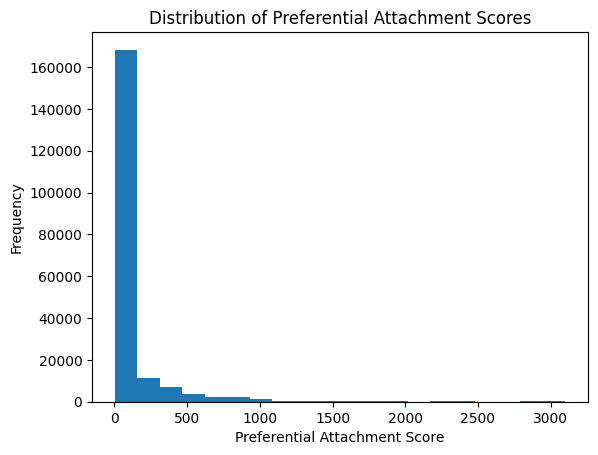

In [66]:
# distribution of Preferential Attachment (PA) scores

pa_scores = [p for u, v, p in nx.preferential_attachment(G)]
plt.hist(pa_scores, bins=20)
plt.xlabel('Preferential Attachment Score')
plt.ylabel('Frequency')
plt.title('Distribution of Preferential Attachment Scores')
plt.show()

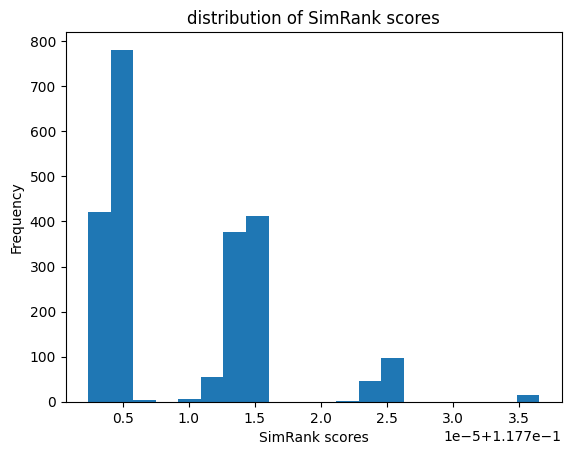

In [68]:
# distribution of SimRank scores
import itertools

def calculate_simrank(G):
    node_pairs = list(itertools.combinations(G.nodes(), 2))
    simrank_scores = [nx.simrank_similarity(G, source, target) for source, target in node_pairs]
    return simrank_scores

def plot_simrank_distribution(simrank_scores):
    plt.hist(simrank_scores, bins=20)
    plt.title('distribution of SimRank scores')
    plt.xlabel('SimRank scores')
    plt.ylabel('Frequency')
    plt.show()

largest_component = get_largest_component(G)
simrank_scores = calculate_simrank(largest_component)
plot_simrank_distribution(simrank_scores)